In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats

In [24]:
abalone = pd.read_csv("Abalone.csv")
abalone['Age'] = abalone['Rings'] + 1.5
abalone.drop(columns=['Rings'], inplace=True)
print(abalone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB
None


In [25]:
# 缺失值 ?
missing_values = abalone.isnull().sum().sort_values(ascending = False)
pd.concat([missing_values], axis=1, keys=['Missing values nums'])

Missing values nums
Age                               0
Shell weight                      0
Viscera weight                    0
Shucked weight                    0
Whole weight                      0
Height                            0
Diameter                          0
Length                            0
Sex                               0

In [26]:
numerical_features = abalone.select_dtypes(include=[np.number]).columns
object_features = abalone.select_dtypes(include=[np.object]).columns

In [27]:
# 特征分析

<AxesSubplot:xlabel='Sex', ylabel='Age'>

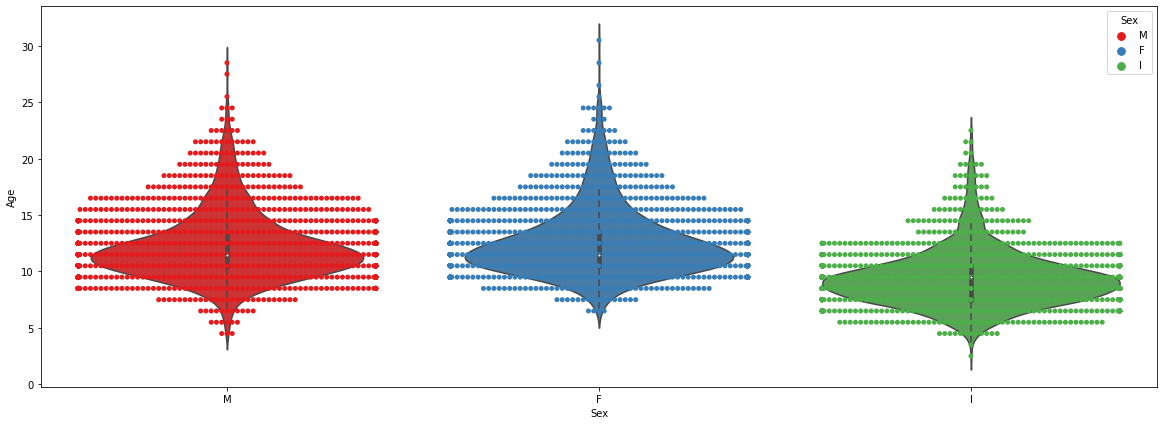

In [28]:
# Age、Sex分别作为 Target
plt.figure(figsize = (20, 7))
# hue -> 簇内也是同一类别
sns.swarmplot(x='Sex', y='Age', data=abalone, hue='Sex', palette="Set1")
sns.violinplot(x='Sex', y='Age', data=abalone, palette="Set1")

<AxesSubplot:>

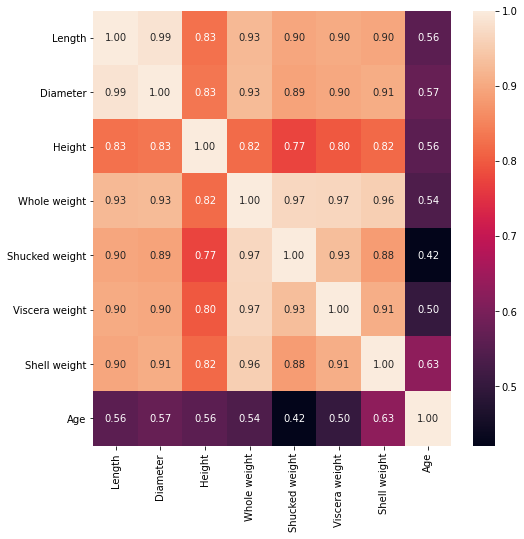

In [29]:
# 绘制皮埃尔相关系数矩阵
plt.figure(figsize=(8, 8))
correlation = abalone[numerical_features].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [30]:
# 多重共线性(分析)
# sns.pairplot(abalone[numerical_features], height=2.5)
# plt.savefig("3.png")

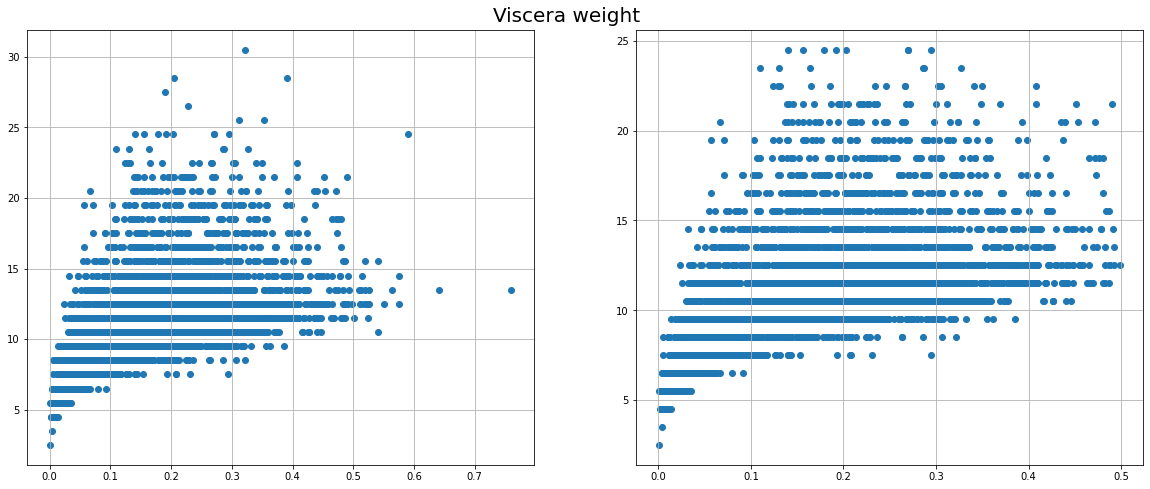

In [31]:
var = 'Viscera weight'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

# 添加网格线
for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])
abalone.drop(abalone[(abalone[var] > 0.5) & (abalone['Age'] < 25)].index, inplace=True)
abalone.drop(abalone[(abalone[var] < 0.5) & (abalone['Age'] > 25)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("0.svg")

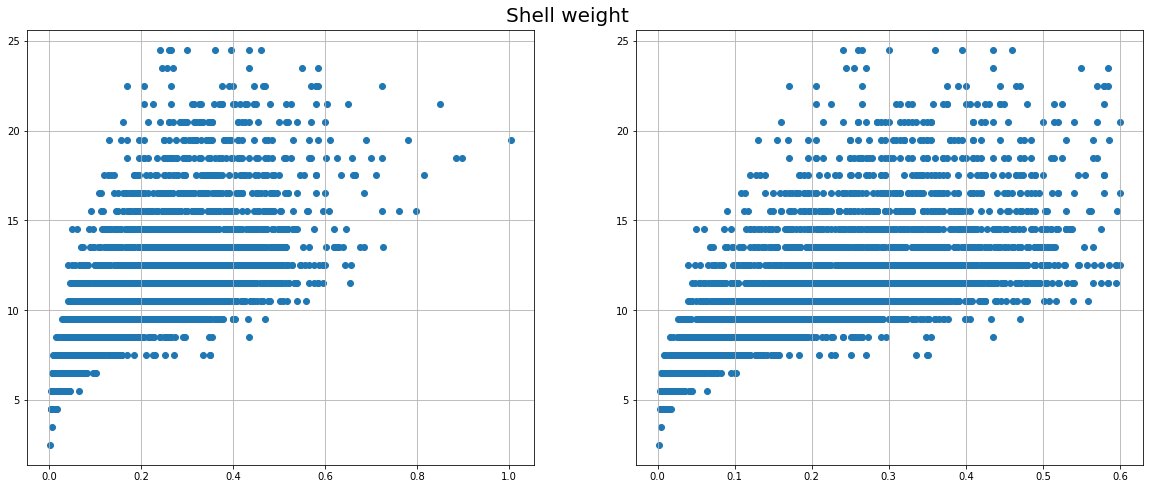

In [32]:
var = 'Shell weight'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var] > 0.6) & (abalone['Age'] < 25)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("1.svg")

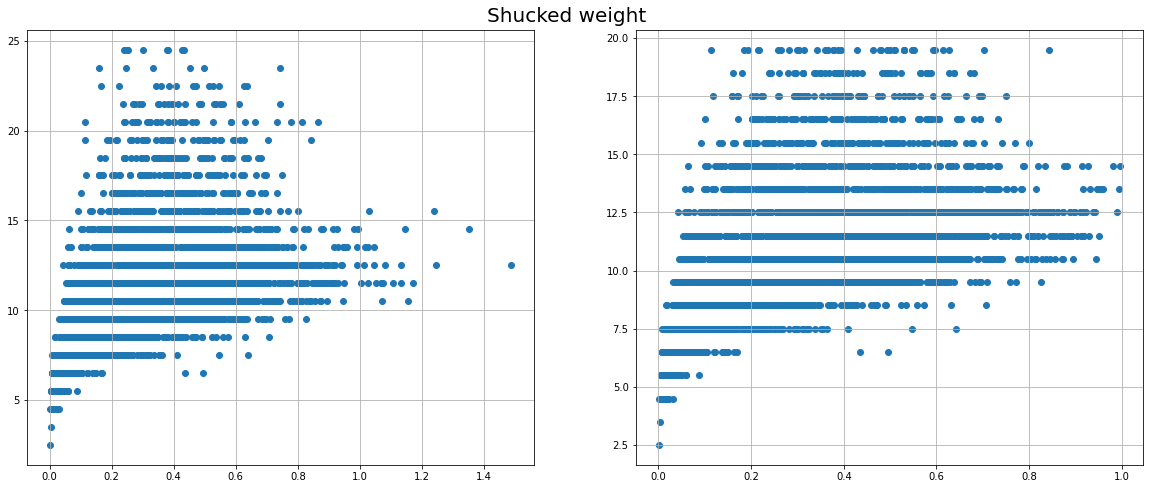

In [33]:
var = 'Shucked weight'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var] >= 1) & (abalone['Age'] < 20)].index, inplace=True)
abalone.drop(abalone[(abalone[var] <1 ) & (abalone['Age'] > 20)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
axs[0].grid(True)
fig.savefig("2.svg")

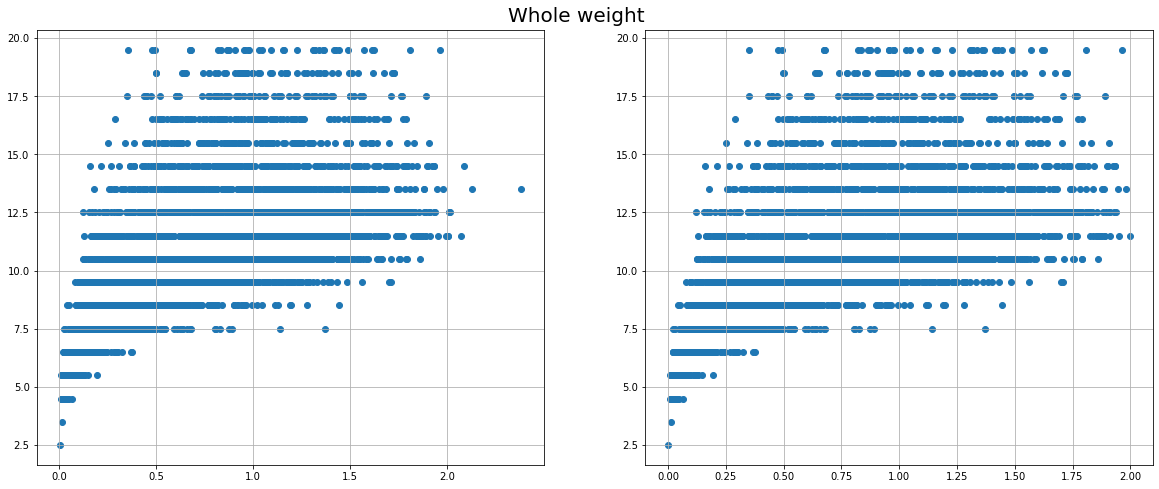

In [34]:
var = 'Whole weight'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var] >= 2) & (abalone['Age'] < 25)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("3.svg")

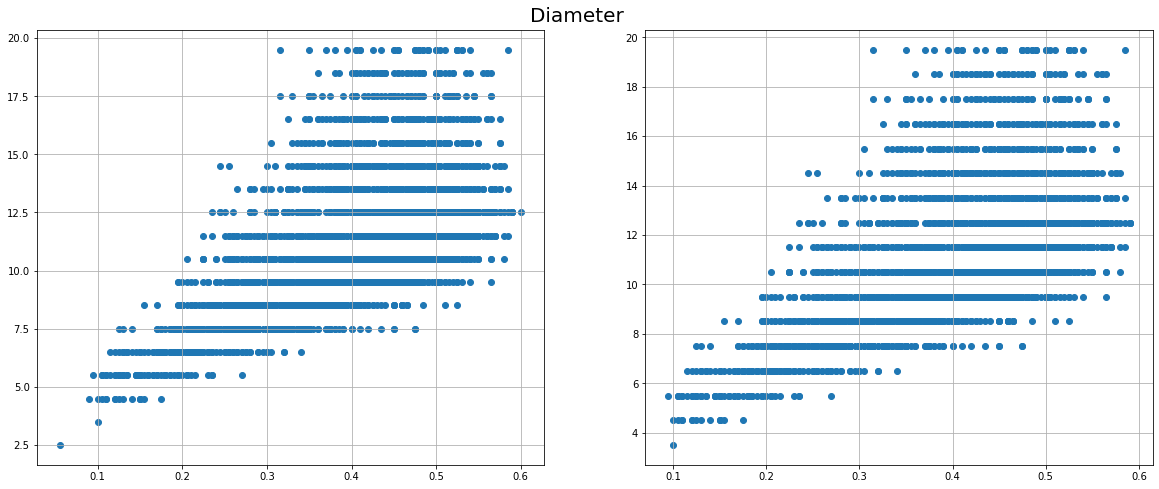

In [35]:
var = 'Diameter'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var] < 0.1) & (abalone['Age'] < 5)].index, inplace=True)
abalone.drop(abalone[(abalone[var] < 0.6) & (abalone['Age'] > 25)].index, inplace=True)
abalone.drop(abalone[(abalone[var] >= 0.6) & (abalone['Age'] < 25)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("4.svg")


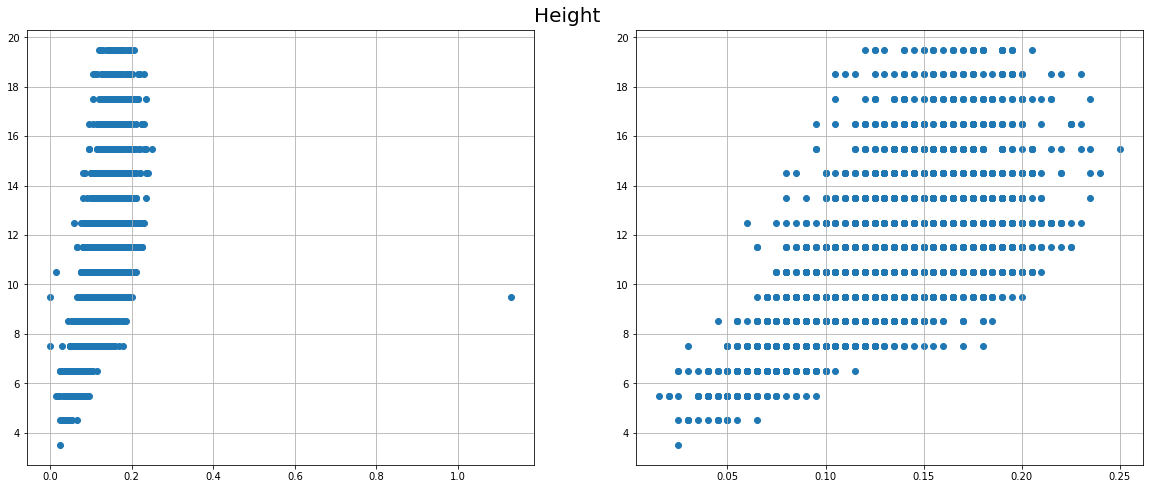

In [36]:
var = 'Height'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var] > 0.4) & (abalone['Age'] < 15)].index, inplace=True)
abalone.drop(abalone[(abalone[var] < 0.02) & (abalone['Age'] > 7)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("5.svg")


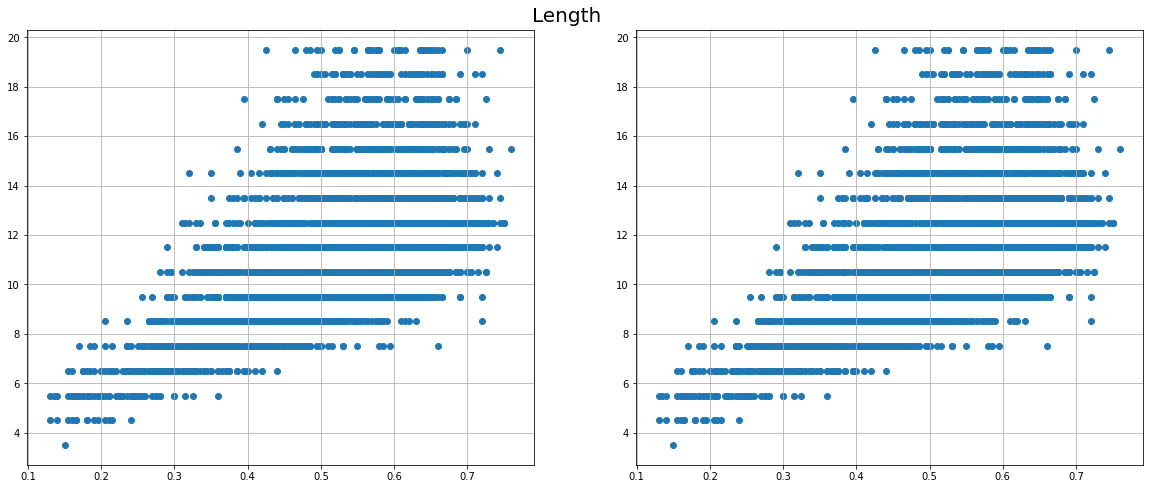

In [37]:
var = 'Length'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(var, y=0.92, fontsize=20)

for i in range(2):
    axs[i].grid(True)

axs[0].scatter(x=abalone[var], y=abalone['Age'])

abalone.drop(abalone[(abalone[var]<0.1) & (abalone['Age'] < 5)].index, inplace=True)
abalone.drop(abalone[(abalone[var]<0.8) & (abalone['Age'] > 25)].index, inplace=True)
abalone.drop(abalone[(abalone[var]>=0.8) & (abalone['Age']< 25)].index, inplace=True)

axs[1].scatter(x=abalone[var], y=abalone['Age'])
fig.savefig("6.svg")


In [38]:
print("清洗后的样本数:", abalone.shape[0])

清洗后的样本数: 3985
